In [1]:
import numpy as np
import gensim
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import re
import statsmodels.formula.api
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.linear_model import LogisticRegression
import re
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
execfile("./FairAI.py")
%matplotlib nbagg

## Protected Groups

Race,
Color,
Religion or creed,
National origin or ancestry,
Sex,
Age,
Physical or mental disability,
Veteran status,
Genetic information,
Citizenship

In [2]:
identities = ['lesbian', 'gay', 'bisexual', 'transgender', 'trans', 'queer', 
              'lgbt', 'lgbtq', 'homosexual', 'straight', 'heterosexual', 'male', 
              'female', 'nonbinary', 'african', 'african american', 'black', 'white', 
              'european', 'hispanic', 'latino', 'latina', 'latinx', 'mexican', 'canadian', 
              'american', 'asian', 'indian', 'middle eastern', 'chinese', 'japanese', 
              'christian', 'muslim', 'jewish', 'buddhist', 'catholic', 'protestant', 'sikh', 
              'taoist', 'old', 'older', 'young', 'younger', 'teenage', 'millenial', 'middle aged', 
              'elderly', 'blind', 'deaf', 'paralyzed']

In [3]:
nationalities=[
'German',
#'African_American',
'Mexican',
'Irish',
'English',
'American',
'Italian',
'Polish',
'French',
'Scottish',
#'Puerto_Rican',
'Norwegian',
'Dutch',
'Swedish',
'Chinese',
'Indian',
'Russian',
'Filipino'
]

In [129]:
religions =[ 
    'Zionist',
    'Catholic',
    'Christian',
    'Islamic',
    'Protestant',
#     'Taoist',
    'Atheist',
    'Hindu',
    'Buddhist',
#     'Diasporic',
    'Sikh',
#     'Juche',
    'Jewish',
#     'Bahai',
#     'Jains',
#     'Shinto',
#     'Pagan'
]

In [5]:
gender= ["male","female","her","him","man","woman","boy","girl","his","hers","mom","dad"]

## Load Datasets

In [224]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = '../data/embeddings/glove.6B/glove.6B.100d.txt'
word2vec_output_file = '../data/embeddings/glove.6B/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)
embeddings = gensim.models.KeyedVectors.load_word2vec_format(word2vec_output_file,binary=False)


In [6]:
#GLOVE
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = '../data/embeddings/glove.6B/glove.6B.100d.txt'
word2vec_output_file = '../data/embeddings/glove.6B/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)
embeddings = gensim.models.KeyedVectors.load_word2vec_format(word2vec_output_file,binary=False)

#Word2vec
# embeddings = gensim.models.KeyedVectors.load_word2vec_format('data/embeddings/GoogleNews-vectors-negative300.bin.gz', binary=True)

#universal sentence encoder
# import tensorflow as tf
# import tensorflow_hub as hub
# module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3"
# # Import the Universal Sentence Encoder's TF Hub module
# embed = hub.Module(module_url)

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.


In [46]:
pos_words = load_lexicon("../data/opinion_lexicon/positive-words.txt")
neg_words = load_lexicon("../data/opinion_lexicon/negative-words.txt")

In [14]:
#kaggle toxicity
df = pd.read_csv("../data/toxicity/wiki_train.csv")
df_test = pd.read_csv("../data/toxicity/wiki_test.csv")

#word sentiment
pos_words = load_lexicon("../data/opinion_lexicon/positive-words.txt")
neg_words = load_lexicon("../data/opinion_lexicon/negative-words.txt")

#imbd
# import numpy
# from keras.datasets import imdb
# from matplotlib import pyplot
# # load the dataset
# (X_train, y_train), (X_test, y_test) = imdb.load_data()
# X = numpy.concatenate((X_train, X_test), axis=0)
# y = numpy.concatenate((y_train, y_test), axis=0)

## Initialize word sentiment dataset or toxicity dataset (wiki)

In [48]:
pos_words_fil = filter(lambda x:  x in embeddings,map(lambda x: x,pos_words))
neg_words_fil = filter(lambda x:  x in embeddings,map(lambda x: x,neg_words))
pos_vectors = embeddings[pos_words_fil]
neg_vectors = embeddings[neg_words_fil]
vectors = np.concatenate([pos_vectors, neg_vectors])
targets = np.array([0 for entry in pos_vectors] + [1 for entry in neg_vectors])
labels = list(pos_vectors) + list(neg_vectors)
train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)

In [358]:
#sentiment word dataset from positve/negative reviews
# pos_words_fil = filter(lambda x:  x in embeddings,map(lambda x: x,pos_words))
# neg_words_fil = filter(lambda x:  x in embeddings,map(lambda x: x,neg_words))
# pos_vectors = embeddings[pos_words_fil]
# neg_vectors = embeddings[neg_words_fil]
# vectors = np.concatenate([pos_vectors, neg_vectors])
# targets = np.array([0 for entry in pos_vectors] + [1 for entry in neg_vectors])
# labels = list(pos_vectors) + list(neg_vectors)
# train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)

#toxicity tweet dataset
# def prepare_training_data(df,num_samples = 1000):
#     toxic_sentences = df[df["is_toxic"]==1]["comment"].sample(num_samples)
#     num_toxic_samples = len(toxic_sentences)
#     non_toxic_sentences = df[df["is_toxic"]==0]["comment"].sample(num_samples)
#     sentences = pd.concat([toxic_sentences, non_toxic_sentences])
#     targets  = np.zeros(num_samples*2)
#     targets[0:num_samples] = 1
#     # train_vectors, test_vectors, train_targets, test_targets = generate_train_test_set(embeddings,targets,sentences)
#     sentences = map(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x.lower()),list(sentences))
#     message_embeddings = None
#     with tf.Session() as session:
#         session.run([tf.global_variables_initializer(), tf.tables_initializer()])
#         message_embeddings = session.run(embed(sentences))
#     return message_embeddings,targets
# train_vectors, train_targets = prepare_training_data(df)
# test_vectors, test_targets = prepare_training_data(df_test)
num_samples = 4000
toxic_sentences = df[df["is_toxic"]==1]["comment"].sample(num_samples)
num_toxic_samples = len(toxic_sentences)
non_toxic_sentences = df[df["is_toxic"]==0]["comment"].sample(num_samples)
sentences = pd.concat([toxic_sentences, non_toxic_sentences])
targets  = np.zeros(num_samples*2)
targets[0:num_samples] = 1
train_vectors, test_vectors, train_targets, test_targets = generate_train_test_set(embeddings,targets,sentences,dim =100)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
7990  sentences in embeddings,  10  sentences not in embeddings


## Create fair regression terms

In [380]:
N = np.zeros((len(nationalities),100))
for i,j in enumerate(nationalities):
    N[i,:] = embeddings[j.lower()]
R = np.zeros((len(religions),100))
for i,j in enumerate(religions):
    R[i,:] = embeddings[j.lower()]
G = np.zeros((len(gender),100))
for i,j in enumerate(gender):
    G[i,:] = embeddings[j.lower()]
regularizers = [N,R,G]

In [344]:
N = None
R = None
G = None
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    N = session.run(embed(map(lambda j: "i am "+j.lower(),nationalities)))
    R = session.run(embed(map(lambda j: "i am "+j.lower(),religions)))
    G = session.run(embed(map(lambda j: "i am "+j.lower(),gender)))
regularizers = [N,R,G]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


## train LR

In [414]:
lr = LogisticRegression(val=(test_vectors,test_targets),X_tils = regularizers,reg_coeff=[0,0,0],lamb=0.01,num_iter=5000,lr=.1)
(RNSB,loss,validation_scores) = lr.fit(train_vectors,train_targets)
print "----------------------------------------------"
lr_debias = LogisticRegression(val=(test_vectors,test_targets),X_tils = regularizers,reg_coeff=[.2,.4,.4],lamb=0.01,num_iter=5000,lr=.1)
(RNSB_debias,loss_debias,validation_scores_debias) = lr_debias.fit(train_vectors,train_targets)

1.4089179602891533 0.0 0.0
loss:  0.6899858714706087
validation MAp:  0.50625
RNSB:  [1.2024915559035614e-05, 2.8867217523790233e-05, 6.117112526749153e-05]
0.3334047228357299 0.31923539124261574 0.0
loss:  0.5119622778929285
validation MAp:  0.76125
RNSB:  [0.12773464304094012, 0.0604108780088423, 0.02119128244554035]
0.3290328577645076 0.32822492182573976 0.0
loss:  0.5095499652022932
validation MAp:  0.7625
RNSB:  [0.13166625415471944, 0.056709019022074265, 0.020555591335018924]
0.3288373022078958 0.32878120340764844 0.0
loss:  0.5094046242647556
validation MAp:  0.76375
RNSB:  [0.13179721690360618, 0.056473547573638275, 0.020534865683591693]
0.3288265482320591 0.3288219690969384 0.0
loss:  0.5093937243851195
validation MAp:  0.76375
RNSB:  [0.13179531055653596, 0.05645752468183624, 0.020533284828063075]
----------------------------------------------
1.4089179602891533 0.0 220.43860854365303
loss:  4.2507756771615615
validation MAp:  0.4675
RNSB:  [0.6981894659581424, 1.305625858044

## plot toxicity histogram for identity terms

In [272]:
lr_debias.validation_fairness(),lr.validation_fairness()

([0.01790546049714184, 0.018232221183425223, 0.0786474042214253],
 [0.14796069394163472, 0.0693864725424754, 0.022273554701395824])

## non-regularized negative sentiment predictions

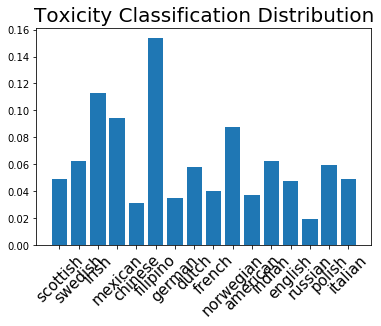

In [382]:
identity_toxicity = dict(identity_toxicity_table(nationalities,embeddings,lr))
identity_toxicity = zip(*identity_toxicity.items())
%matplotlib inline
plt.figure()
plt.title("Toxicity Classification Distribution",fontsize=20)
index = np.arange(len(identity_toxicity[0]))
plt.bar(index,identity_toxicity[1]/np.sum(identity_toxicity[1]))
plt.xticks(index, identity_toxicity[0], fontsize=15, rotation=45)
plt.show()

In [318]:
T = np.sum(np.array(identity_toxicity[1]))
D = np.array(identity_toxicity[1])/T
np.sum(D*np.log(D/(1./len(D))))

0.14799110976843968

## regularized negative sentiment predictions

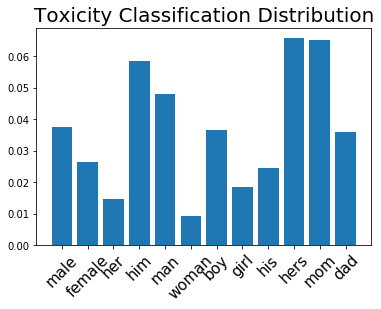

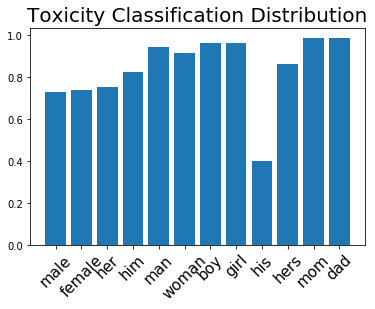

In [383]:
identities = gender
a = []
b=[]
for i in G:
    a.append(lr_debias.predict_proba(i)[1])
    b.append(lr.predict_proba(i)[1])
    
%matplotlib inline
plt.figure()
plt.title("Toxicity Classification Distribution",fontsize=20)
index = np.arange(len(a))
plt.bar(index,a)
plt.xticks(index, identities, fontsize=15, rotation=45)
plt.show()
plt.figure()
plt.title("Toxicity Classification Distribution",fontsize=20)
index = np.arange(len(b))
plt.bar(index,b)
plt.xticks(index, identities, fontsize=15, rotation=45)
plt.show()

In [157]:
T = np.sum(b)
D = np.array(b)/T
np.sum(D*np.log(D/(1./len(D))))

0.0022853441668085088

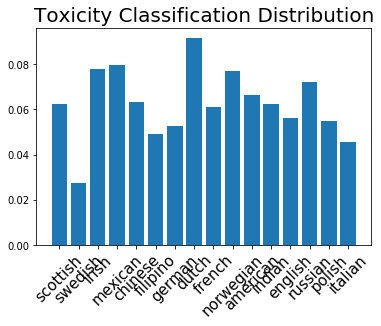

In [384]:
identity_toxicity = dict(identity_toxicity_table(nationalities,embeddings,lr_debias))
identity_toxicity = zip(*identity_toxicity.items())
%matplotlib inline
plt.figure()
plt.title("Toxicity Classification Distribution",fontsize=20)
index = np.arange(len(identity_toxicity[0]))
plt.bar(index,identity_toxicity[1]/np.sum(identity_toxicity[1]))
plt.xticks(index, identity_toxicity[0], fontsize=15, rotation=45)
plt.show()

In [320]:
T = np.sum(np.array(identity_toxicity[1]))
D = np.array(identity_toxicity[1])/T
np.sum(D*np.log(D/(1./len(D))))

0.03895405565897892

## Plot training curves

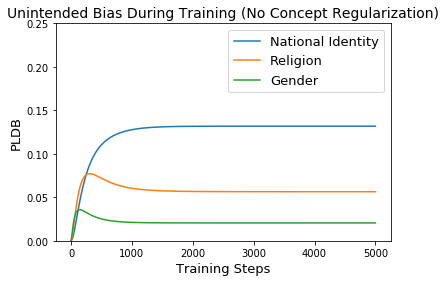

In [419]:
plt.figure()
plt.plot(zip(*RNSB)[0],label="National Identity")
plt.plot(zip(*RNSB)[1],label="Religion")
plt.plot(zip(*RNSB)[2],label="Gender")
plt.ylim((0,.25))

plt.title("Unintended Bias During Training (No Concept Regularization)",fontsize=14)
plt.xlabel("Training Steps",fontsize=13)
plt.ylabel("PLDB",fontsize=13)

plt.legend(fontsize=13)

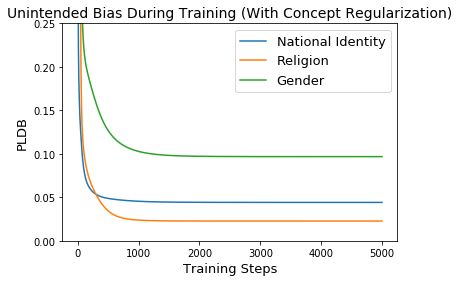

In [416]:
plt.figure()
plt.plot(zip(*RNSB_debias)[0][np.argmax(zip(*RNSB_debias)[0]):],label="National Identity")
plt.plot(zip(*RNSB_debias)[1][np.argmax(zip(*RNSB_debias)[1]):],label="Religion")
plt.plot(zip(*RNSB_debias)[2][np.argmax(zip(*RNSB_debias)[2]):],label="Gender")

plt.ylim((0,.25))
plt.title("Unintended Bias During Training (With Concept Regularization)",fontsize=14)
plt.xlabel("Training Steps",fontsize=13)
plt.ylabel("PLDB",fontsize=13)

plt.legend(fontsize=13)

## How can we use PCA to find projections of data that are more fair?

In [328]:
def run_lr_on_this_data(new_train_vectors):    
    lr = LogisticRegression(val=(test_vectors,test_targets),X_tils = regularizers,reg_coeff=[0,0,0],lamb=0.01,num_iter=2000)
    (RNSB,loss,validation_scores) = lr.fit(new_train_vectors,train_targets)
    return lr
    print("----------------------------------------------")

## Application to Yelp Reviews

In [403]:
def run_loo_experiment(num_singular_vectors):
    leave_one_out_matricies = leave_one_out_efficiently(train_vectors, num_singular_vectors)

#     Un-pca'd LR
    og_lr = LogisticRegression(val=(test_vectors,test_targets),X_tils = regularizers,reg_coeff=[0,0,0],lamb=0.01,num_iter=5000,lr = 0.1)
    (RNSB,loss,validation_scores) = og_lr.fit(train_vectors,train_targets)

    lr_metrics = []
    
    for i in range(len(leave_one_out_matricies)):
        lr_metrics.append(run_lr_on_this_data(leave_one_out_matricies[i]))
        print("finished with " + str(i) + " runs of " + str(len(leave_one_out_matricies)))
        print("____________________")
        print()
        
    return lr_metrics#, og_lr 


In [233]:
terms= []
for i in nationalities:
    terms.append("i love " + i + " food")

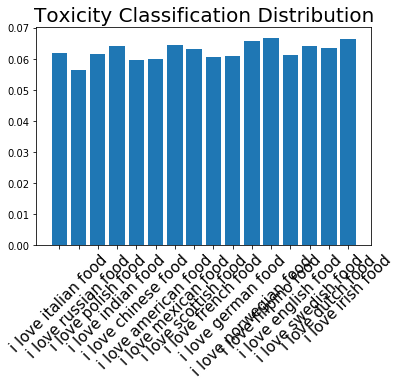

In [234]:
identity_toxicity = dict(identity_toxicity_table(terms,embeddings,lr))
identity_toxicity = zip(*identity_toxicity.items())
%matplotlib inline
plt.figure()
plt.title("Toxicity Classification Distribution",fontsize=20)
index = np.arange(len(identity_toxicity[0]))
plt.bar(index,identity_toxicity[1]/np.sum(identity_toxicity[1]))
plt.xticks(index, identity_toxicity[0], fontsize=15, rotation=45)
plt.show()

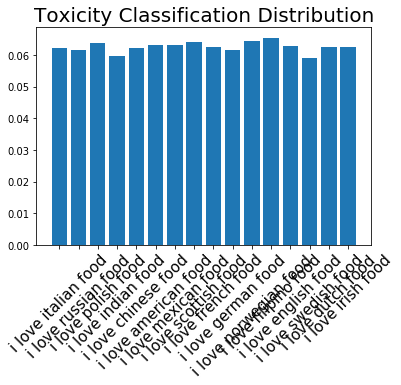

In [208]:
identity_toxicity = dict(identity_toxicity_table(terms,embeddings,lr_debias))
identity_toxicity = zip(*identity_toxicity.items())
%matplotlib inline
plt.figure()
plt.title("Toxicity Classification Distribution",fontsize=20)
index = np.arange(len(identity_toxicity[0]))
plt.bar(index,identity_toxicity[1]/np.sum(identity_toxicity[1]))
plt.xticks(index, identity_toxicity[0], fontsize=15, rotation=45)
plt.show()

In [356]:
# Original, non-fairness whatever lr
og_lr = LogisticRegression(val=(test_vectors,test_targets),X_tils = regularizers,reg_coeff=[0,0,0],lamb=0.01,num_iter=4000)
(RNSB_debias,loss_debias,validation_scores_debias) = og_lr.fit(train_vectors,train_targets)

# Regularized
lr_debias = LogisticRegression(val=(test_vectors,test_targets),X_tils = regularizers,reg_coeff=[.2,.2,.2],lamb=0.01,num_iter=4000)
(RNSB_debias,loss_debias,validation_scores_debias) = lr_debias.fit(train_vectors,train_targets)


1.820449051682882 0.0 0.0
loss:  0.6930441639708224
validation MAp:  0.8455
RNSB:  [1.1192195801347965e-10, 4.5303979768305414e-10, 5.029054211698622e-10]
1.5269129422575445 0.3003078922987353 0.0
loss:  0.6147093419606584
validation MAp:  0.85
RNSB:  [6.914938024502157e-05, 0.00026648083333542615, 0.000285069237189425]
1.3479735740965633 0.5042502699181157 0.0
loss:  0.5685534696593236
validation MAp:  0.8565
RNSB:  [0.00018505698439430377, 0.0006895596088859333, 0.0007150157426062376]
1.2339138361682227 0.6454093407240566 0.0
loss:  0.5397202045549909
validation MAp:  0.862
RNSB:  [0.00029504542220522463, 0.001074021014908297, 0.001089136712106236]
1.820449051682882 0.0 77.32398477948252
loss:  0.6939917243549799
validation MAp:  0.4835
RNSB:  [7.007344549375043e-08, 1.8365915078159952e-07, 4.0191402606078327e-07]
2.2625980719061243 1.4379012406937404 2.6741932732083495
loss:  0.7298851167053076
validation MAp:  0.5045
RNSB:  [0.0023524863378986995, 0.007259771298168804, 0.0141575179

In [331]:
train_vectors_5 = np.array(remove_principle_component(train_vectors,4))

# Removing 5th principle component
lr_minus5 = LogisticRegression(val=(test_vectors,test_targets),X_tils = regularizers,reg_coeff=[0,0,0],lamb=0.01,num_iter=4000)
(RNSB_debias,loss_debias,validation_scores_debias) = lr_minus5.fit(train_vectors_5, train_targets)


1.3494472354363982 0.0 0.0
loss:  0.6928457477887645
validation MAp:  0.5475
RNSB:  [9.099133615393423e-08, 2.2040071716301869e-07, 5.666901346280961e-07]
0.5825987944826515 0.1495609244137304 0.0
loss:  0.5782326551003002
validation MAp:  0.7425
RNSB:  [0.027560511678341802, 0.045399362533398206, 0.037296208672045486]
0.41846823098208624 0.20893069679189502 0.0
loss:  0.5514784370555257
validation MAp:  0.7525
RNSB:  [0.05909484522344571, 0.07514999398214071, 0.039556822648881884]
0.3621333685725111 0.2392598807201221 0.0
loss:  0.5396292896709342
validation MAp:  0.7575
RNSB:  [0.0786434348924428, 0.08427023826017344, 0.036260099350994016]


In [332]:
# Removing 5th principle component AND Regularized
lr_minus5_reg = LogisticRegression(val=(test_vectors,test_targets),X_tils = regularizers,reg_coeff=[.3,.3,.3],lamb=0.01,num_iter=2000)
(RNSB_debias,loss_debias,validation_scores_debias) = lr_minus5_reg.fit(train_vectors_5, train_targets)

# Removing 5th principle component AND Regularized, with .1, .1, .1
lr_minus5_reg2 = LogisticRegression(val=(test_vectors,test_targets),X_tils = regularizers,reg_coeff=[.4,.4,.4],lamb=0.01,num_iter=2000)
(RNSB_debias,loss_debias,validation_scores_debias) = lr_minus5_reg2.fit(train_vectors_5, train_targets)

1.3494472354363982 0.0 216.23455428386683
loss:  0.7667735143903436
validation MAp:  0.4975
RNSB:  [0.007145079886205132, 0.017506003154691304, 0.028392079773885637]
1.6183013676795661 0.31204442529768867 1.5977981483551646
loss:  0.6692079391903948
validation MAp:  0.595
RNSB:  [0.049466591683182425, 0.08505332639799651, 0.2169633484021386]
1.3494472354363982 0.0 288.31273904515575
loss:  0.8275376882789939
validation MAp:  0.4975
RNSB:  [0.014856931587857856, 0.03641584971616199, 0.0608544814557702]
1.6823131563314178 0.3189646058169696 1.6752403748065596
loss:  0.6743531116664281
validation MAp:  0.5775
RNSB:  [0.040378496721441254, 0.06866697698252758, 0.18836718976473432]


In [404]:
lr_metrics = run_loo_experiment(20)

1.4089179602891533 0.0 0.0
loss:  0.6899858714706087
validation MAp:  0.50625
RNSB:  [1.2024915559035614e-05, 2.8867217523790233e-05, 6.117112526749153e-05]
0.3334047228357299 0.31923539124261574 0.0
loss:  0.5119622778929285
validation MAp:  0.76125
RNSB:  [0.12773464304094012, 0.0604108780088423, 0.02119128244554035]
0.3290328577645076 0.32822492182573976 0.0
loss:  0.5095499652022932
validation MAp:  0.7625
RNSB:  [0.13166625415471944, 0.056709019022074265, 0.020555591335018924]
0.3288373022078958 0.32878120340764844 0.0
loss:  0.5094046242647556
validation MAp:  0.76375
RNSB:  [0.13179721690360618, 0.056473547573638275, 0.020534865683591693]
0.3288265482320591 0.3288219690969384 0.0
loss:  0.5093937243851195
validation MAp:  0.76375
RNSB:  [0.13179531055653596, 0.05645752468183624, 0.020533284828063075]
1.2995418903907066 0.0 0.0
loss:  0.6928721706800726
validation MAp:  0.73625
RNSB:  [3.586958174737066e-08, 1.1488751213388623e-07, 3.6020080079523847e-07]
0.5979426199118205 0.151

finished with 19 runs of 20
____________________
()


[0.000387197779319815, 0.0013862524275349908, 0.0013852967028931277]
0.75125
0.63875
0.7325
0.74
0.735
0.7375
0.74875
0.745
0.75
0.75
0.75
0.74875
0.74625
0.74625
0.75
0.7475
0.74875
0.75
0.7475
0.74875


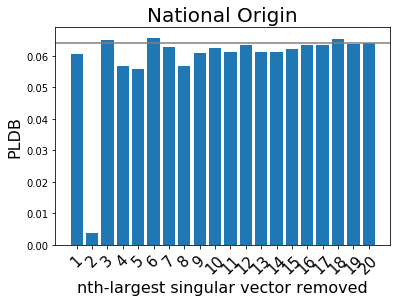

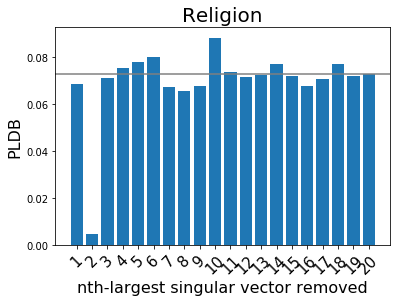

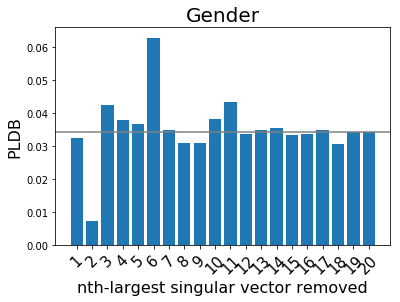

In [420]:
def plot_RNSB_bar(lr_list, og_lr):
    
    rnsb_list = [i.validation_fairness() for i in lr_list]
    metric_a, metric_b, metric_c  = zip(*rnsb_list)
    
#     identity_toxicity = dict(identity_toxicity_table(nationalities,embeddings,lr))
#     identity_toxicity = list(zip(*identity_toxicity.items()))
    
    %matplotlib inline
    plt.figure(figsize=(6,4))
    plt.title("National Origin",fontsize=20)
    index = np.arange(len(metric_a)) + 1
    plt.bar(index,metric_a)
    plt.xticks(index, index, fontsize=15, rotation=45)
    plt.axes().axhline(y=lr.validation_fairness()[0], color="gray")
    plt.ylabel("PLDB",fontsize=16)
    plt.xlabel("nth-largest singular vector removed",fontsize=16)
    plt.show()
    
    %matplotlib inline
    plt.figure(figsize=(6,4))
    plt.title("Religion",fontsize=20)
    index = np.arange(len(metric_b)) + 1
    plt.bar(index,metric_b)
    plt.xticks(index, index, fontsize=15, rotation=45)
    plt.axes().axhline(y=lr.validation_fairness()[1], color="gray")
    plt.ylabel("PLDB",fontsize=16)
    plt.xlabel("nth-largest singular vector removed",fontsize=16)
    plt.show()
    
    
    %matplotlib inline
    plt.figure(figsize=(6,4))
    plt.title("Gender",fontsize=20)
    index = np.arange(len(metric_c)) + 1
    plt.bar(index,metric_c)
    plt.xticks(index, index, fontsize=15, rotation=45)
    plt.axes().axhline(y=lr.validation_fairness()[2], color="gray")
    plt.ylabel("PLDB",fontsize=16)
    plt.xlabel("nth-largest singular vector removed",fontsize=16)
    plt.show()

    
print(og_lr.validation_fairness())
for lr in lr_metrics:
    print(lr.validation(lr.val[0],lr.val[1]))
plot_RNSB_bar(lr_metrics, og_lr)



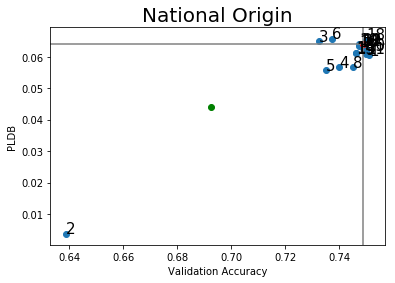

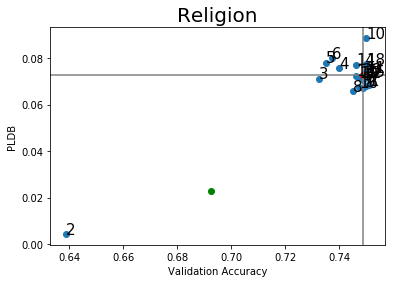

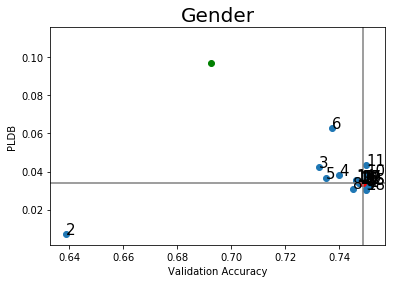

In [421]:
def annotate_data(labels, points, plt):
    
    for label, point in zip(labels, points):
        plt.annotate(label,xy=point,fontsize=15)
    

def plot_RNSB_scatter(lr_list, og_lr):
    
    rnsb_list = [lr.validation_fairness() for lr in lr_list]
    validation_list = [lr.validation(lr.val[0],lr.val[1]) for lr in lr_list]
    metric_a, metric_b, metric_c  = zip(*rnsb_list)
    
    og_rnsb_a, og_rnsb_b, og_rnsb_c = og_lr.validation_fairness()
    og_validation = og_lr.validation(og_lr.val[0],og_lr.val[1])
    
    (debias_rnsb_a, debias_rnsb_b, debias_rnsb_c), debias_acc = get_metrics(lr_debias)

    
    %matplotlib inline
    plt.figure(figsize=(6,4))
    plt.title("National Origin",fontsize=20)
    plt.xlabel("Validation Accuracy")
    plt.ylabel("PLDB")
    plt.scatter(debias_acc, debias_rnsb_a,color="green")
    plt.scatter(validation_list, metric_a)
    plt.scatter(og_validation, og_rnsb_a, color="red")
    plt.axes().axhline(y=og_rnsb_a, color="gray")
    plt.axes().axvline(x=og_validation, color="gray")
    annotate_data([str(i+1) for i in range(len(lr_list))], zip(validation_list, metric_a), plt)
    plt.show()
    
    %matplotlib inline
    plt.figure(figsize=(6,4))
    plt.title("Religion",fontsize=20)
    plt.xlabel("Validation Accuracy")
    plt.ylabel("PLDB")
    plt.scatter(debias_acc, debias_rnsb_b,color="green")
    plt.scatter(validation_list, metric_b)
    plt.scatter(og_validation, og_rnsb_b, color="red")
    plt.axes().axhline(y=og_rnsb_b, color="gray")
    plt.axes().axvline(x=og_validation, color="gray")
    annotate_data([str(i+1) for i in range(len(lr_list))], zip(validation_list, metric_b), plt)
    plt.show()
    
    %matplotlib inline
    plt.figure(figsize=(6,4))
    plt.title("Gender",fontsize=20)
    plt.xlabel("Validation Accuracy")
    plt.ylabel("PLDB")
    plt.scatter(debias_acc, debias_rnsb_c,color="green")
    plt.scatter(validation_list, metric_c)
    plt.scatter(og_validation, og_rnsb_c, color="red")
    plt.axes().axhline(y=og_rnsb_c, color="gray")
    plt.axes().axvline(x=og_validation, color="gray")
    annotate_data([str(i+1) for i in range(len(lr_list))], zip(validation_list, metric_c), plt)
    plt.show()
    
    
plot_RNSB_scatter(lr_metrics, lr)


In [336]:
def get_metrics(lr_):
    a,b,c = lr_.validation_fairness()
    acc = lr_.validation(lr_.val[0], lr_.val[1])
    return ((a,b,c),acc)
    

In [337]:
print(get_metrics(lr_minus5))

((0.0902422317369215, 0.08581876819090131, 0.03287436668802303), 0.76)


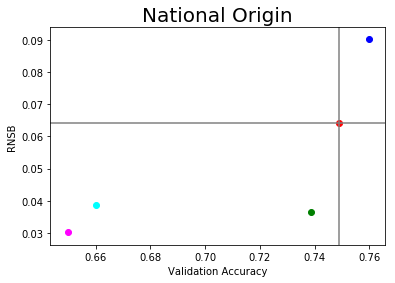

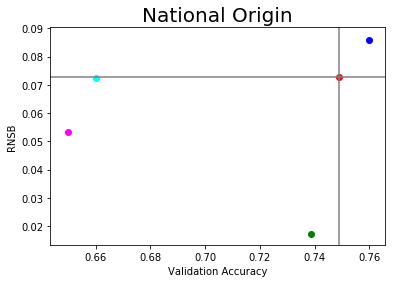

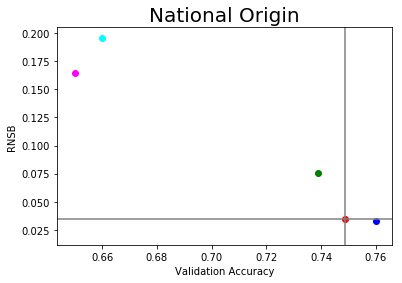

In [370]:
def annotate_data(labels, points, plt):

    for label, point in zip(labels, points):
        plt.annotate(label,xy=point,fontsize=15)
    

def plot_RNSB_scatter(og_lr, lr_debias, lr_minus5, lr_minus5_reg, lr_minus5_reg2):
    
#     rnsb_list = [lr.validation_fairness() for lr in lr_list]
#     validation_list = [lr.validation(lr.val[0],lr.val[1]) for lr in lr_list]
#     metric_a, metric_b, metric_c  = zip(*rnsb_list)
    
    
    
    (og_rnsb_a, og_rnsb_b, og_rnsb_c), og_acc = get_metrics(og_lr)
    (debias_rnsb_a, debias_rnsb_b, debias_rnsb_c), debias_acc = get_metrics(lr_debias)
    (minus5_rnsb_a, minus5_rnsb_b, minus5_rnsb_c), minus5_acc = get_metrics(lr_minus5)
    (minus5_reg_rnsb_a, minus5_reg_rnsb_b, minus5_reg_rnsb_c), minus5_reg_acc = get_metrics(lr_minus5_reg)
    (minus5_reg2_rnsb_a, minus5_reg2_rnsb_b, minus5_reg2_rnsb_c), minus5_reg2_acc = get_metrics(lr_minus5_reg2)

    %matplotlib inline
    plt.figure(figsize=(6,4))
    plt.title("National Origin",fontsize=20)
    plt.xlabel("Validation Accuracy")
    plt.ylabel("RNSB")
    plt.scatter(og_acc, og_rnsb_a, color="red")
    plt.scatter(debias_acc, debias_rnsb_a, color="green")
    plt.scatter(minus5_acc, minus5_rnsb_a, color="blue")
    plt.scatter(minus5_reg_acc, minus5_reg_rnsb_a, color="cyan")
    plt.scatter(minus5_reg2_acc, minus5_reg2_rnsb_a, color="magenta")
    plt.axes().axhline(y=og_rnsb_a, color="gray")
    plt.axes().axvline(x=og_acc, color="gray")
    plt.show()
    
    %matplotlib inline
    plt.figure(figsize=(6,4))
    plt.title("National Origin",fontsize=20)
    plt.xlabel("Validation Accuracy")
    plt.ylabel("RNSB")
    plt.scatter(og_acc, og_rnsb_b, color="red")
    plt.scatter(debias_acc, debias_rnsb_b, color="green")
    plt.scatter(minus5_acc, minus5_rnsb_b, color="blue")
    plt.scatter(minus5_reg_acc, minus5_reg_rnsb_b, color="cyan")
    plt.scatter(minus5_reg2_acc, minus5_reg2_rnsb_b, color="magenta")
    plt.axes().axhline(y=og_rnsb_b, color="gray")
    plt.axes().axvline(x=og_acc, color="gray")
    plt.show()
    
    %matplotlib inline
    plt.figure(figsize=(6,4))
    plt.title("National Origin",fontsize=20)
    plt.xlabel("Validation Accuracy")
    plt.ylabel("RNSB")
    plt.scatter(og_acc, og_rnsb_c, color="red")
    plt.scatter(debias_acc, debias_rnsb_c, color="green")
    plt.scatter(minus5_acc, minus5_rnsb_c, color="blue")
    plt.scatter(minus5_reg_acc, minus5_reg_rnsb_c, color="cyan")
    plt.scatter(minus5_reg2_acc, minus5_reg2_rnsb_c, color="magenta")
    plt.axes().axhline(y=og_rnsb_c, color="gray")
    plt.axes().axvline(x=og_acc, color="gray")
    plt.show()
    
    

plot_RNSB_scatter(lr, lr_debias, lr_minus5, lr_minus5_reg, lr_minus5_reg2)

## test toxicity on gender equalized vs non equalized

In [31]:
text_to_toxicity(lr,embeddings,'US'),text_to_toxicity(lr,embeddings,'mexico')

(0.36661537828835794, 0.3567748880403069)

In [32]:
text_to_toxicity(lr_debias,embeddings,'US'),text_to_toxicity(lr_debias,embeddings,'mexico')

(0.12204326831854055, 0.1445869363987806)

In [33]:
text_to_toxicity(lr,embeddings,'i am american'),text_to_toxicity(lr,embeddings,'i am mexican')

(0.3699384834388969, 0.38649930678260114)

In [34]:
text_to_toxicity(lr_debias,embeddings,'i am american'),text_to_toxicity(lr_debias,embeddings,"i am mexican")

(0.03315009250991013, 0.04042289899861159)

In [35]:
text_to_toxicity(lr,embeddings,'catholic'),text_to_toxicity(lr,embeddings,'jewish')

(0.3848486017704987, 0.5268961571196253)

In [36]:
text_to_toxicity(lr_debias,embeddings,'catholic'),text_to_toxicity(lr_debias,embeddings,'jewish')

(0.015964796621748392, 0.0033421528002908767)

In [37]:
text_to_toxicity(lr,embeddings,'male'),text_to_toxicity(lr,embeddings,'female')

(0.5012111452965706, 0.3472907616969977)

In [38]:
text_to_toxicity(lr_debias,embeddings,'male'),text_to_toxicity(lr_debias,embeddings,'female')

(0.04440018644761306, 0.022148190673039803)

In [39]:
text_to_toxicity(lr,embeddings,'boy'),text_to_toxicity(lr,embeddings,'girl')

(0.7629864222239543, 0.6589582419538095)

In [40]:
text_to_toxicity(lr_debias,embeddings,'boy'),text_to_toxicity(lr_debias,embeddings,'girl')

(0.04240716477696199, 0.036029908870283386)

In [41]:
text_to_toxicity(lr_debias,embeddings,'dude'),text_to_toxicity(lr_debias,embeddings,'gal')

(0.21408713637515295, 0.22686000910852128)

## model comparison with different methods

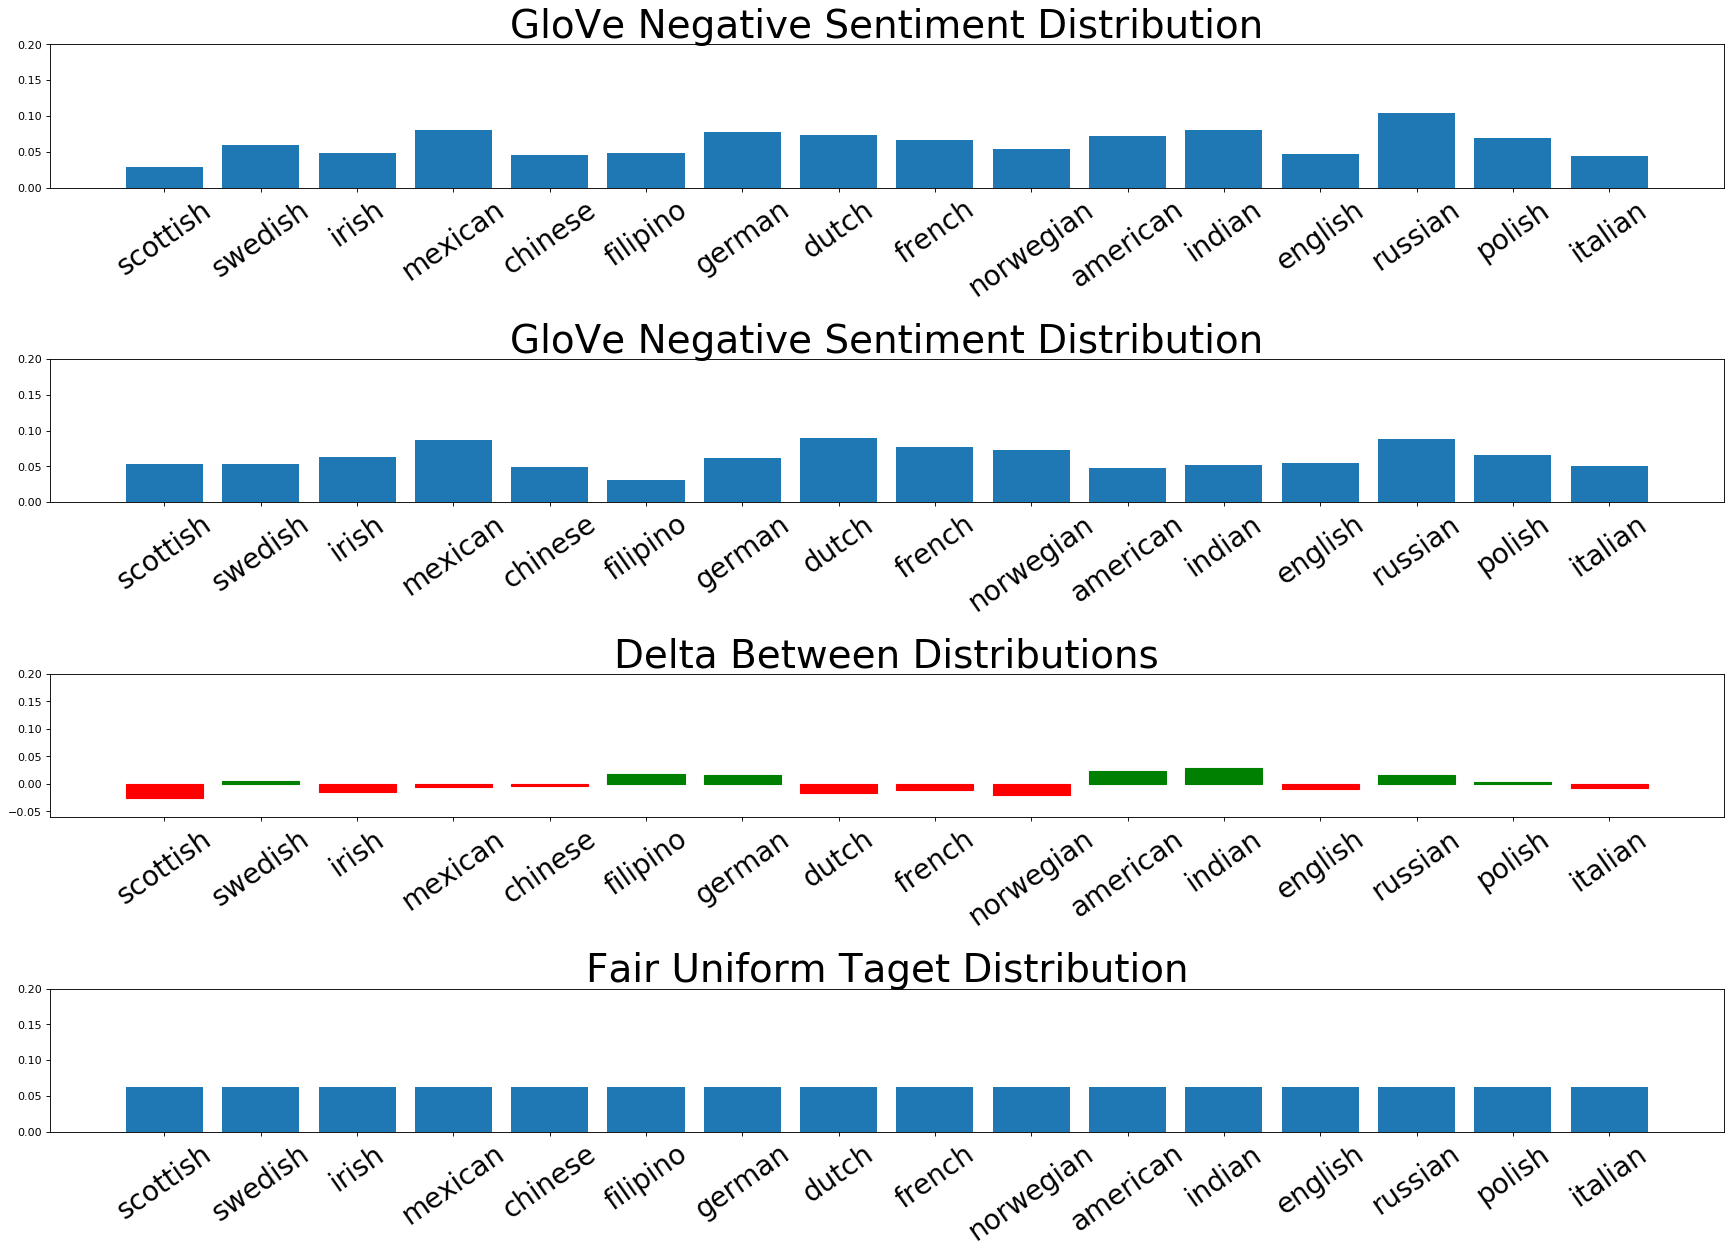

kl divergence from uniform dist for debiased classification: 0.03433297946588906
kl divergence from uniform dist for non debiased classification: 0.04394810892850501


In [42]:
identity_toxicity_debias = dict(identity_toxicity_table(nationalities, embeddings,lr_debias))
identity_toxicity = dict(identity_toxicity_table(nationalities,embeddings,lr))
# keys_common = set(map(lambda x : x[6:] , identity_toxicity_debias.keys())).intersection(set(identity_toxicity.keys()))
# identity_toxicity_debias = {key: identity_toxicity_debias[key] for key in keys_common }
# identity_toxicity = {key: identity_toxicity[key] for key in keys_common }
identity_toxicity_debias = zip(*identity_toxicity_debias.items())
identity_toxicity = zip(*identity_toxicity.items())
%matplotlib inline
f = plt.figure(figsize=(27, 18), dpi= 80, facecolor='w', edgecolor='k')
f.subplots_adjust(hspace=1.2)
f.add_subplot(411)
plt.title("GloVe Negative Sentiment Distribution",fontsize=35)
index = np.arange(len(identity_toxicity[0]))
plt.bar(index,identity_toxicity[1]/np.sum(identity_toxicity[1]))
plt.xticks(index, identity_toxicity[0], fontsize=25, rotation=35)
plt.ylim(top=.2,bottom=0)
f.add_subplot(412)
plt.title("GloVe Negative Sentiment Distribution",fontsize=35)
index = np.arange(len(identity_toxicity_debias[0]))
plt.bar(index,identity_toxicity_debias[1]/np.sum(identity_toxicity_debias[1]))
plt.xticks(index, identity_toxicity_debias[0], fontsize=25, rotation=35)
plt.ylim(top=.2,bottom=0)
f.add_subplot(413)
plt.title("Delta Between Distributions",fontsize=35)
index = np.arange(len(identity_toxicity_debias[0]))
delta = identity_toxicity[1]/np.sum(identity_toxicity[1])-identity_toxicity_debias[1]/np.sum(identity_toxicity_debias[1])
bar = plt.bar(index,delta)
for i,j in enumerate(delta):
    bar[i].set_color('r') if j<0 else bar[i].set_color('g')
plt.xticks(index, identity_toxicity_debias[0], fontsize=25, rotation=35)
plt.ylim(top=.2,bottom=-.06)
f.add_subplot(414)
plt.title('Fair Uniform Taget Distribution',fontsize=35)
index = np.arange(len(identity_toxicity[0]))
plt.bar(index,1./len(identity_toxicity[1]))
plt.xticks(index, identity_toxicity[0], fontsize=25, rotation=35)
plt.ylim(top=.2,bottom=0)
plt.show()
uniform_dist = np.ones(len(identity_toxicity[1]))*1./len(identity_toxicity[1])
uniform_dist_d = np.ones(len(identity_toxicity_debias[1]))*1./len(identity_toxicity_debias[1])

debiased_normalized = identity_toxicity_debias[1]/np.sum(identity_toxicity_debias[1])
biased_normalized = identity_toxicity[1]/np.sum(identity_toxicity[1])
kl_debiased = (debiased_normalized * np.log(debiased_normalized/uniform_dist_d)).sum()
kl_biased = (biased_normalized * np.log(biased_normalized/uniform_dist)).sum()
print 'kl divergence from uniform dist for debiased classification:',kl_debiased
print 'kl divergence from uniform dist for non debiased classification:',kl_biased

## Evaluate Relative Similarites Between Demographics

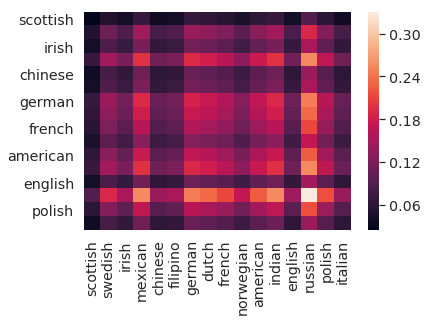

In [43]:
from pandas import DataFrame
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline
A = np.outer(identity_toxicity[1],identity_toxicity[1])

df = DataFrame(A, index=identity_toxicity[0], columns=identity_toxicity[0])

sns.heatmap(df, annot=False)

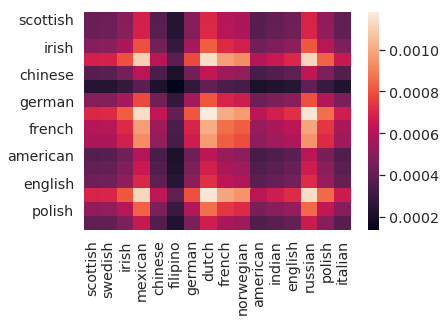

In [44]:
A = np.outer(identity_toxicity_debias[1],identity_toxicity_debias[1])

df = DataFrame(A, index=identity_toxicity_debias[0], columns=identity_toxicity_debias[0])

sns.heatmap(df, annot=False)